In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


Tree decision, random forest

In [2]:
# IMPORT CÁC THƯ VIỆN CẦN THIẾT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz

In [3]:
# NẠP VÀ XEM DỮ LIỆU
df = pd.read_csv("Data_Python_ST3/BT2/diabetes_prediction_dataset.csv")

print(" Kích thước dữ liệu:", df.shape)
print(df.head())

# Kiểm tra giá trị null
print("\nGiá trị thiếu:")
print(df.isnull().sum())

 Kích thước dữ liệu: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Giá trị thiếu:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int6

In [4]:
# CHUẨN BỊ DỮ LIỆU
# Xác định biến đầu vào (X) và đầu ra (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X = pd.get_dummies(X, drop_first=True)

# Chia dữ liệu train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# XÂY DỰNG MÔ HÌNH CÂY QUYẾT ĐỊNH
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\n===  CÂY QUYẾT ĐỊNH ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


===  CÂY QUYẾT ĐỊNH ===
Accuracy: 0.97215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



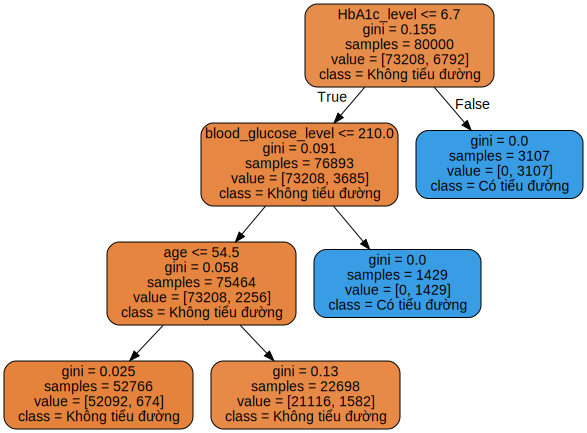

In [6]:
# Hiển thị cây (Graphviz)
dot_data = export_graphviz(
    dt, out_file=None, filled=True, rounded=True,
    feature_names=X.columns, class_names=['Không tiểu đường', 'Có tiểu đường']
)
graph = graphviz.Source(dot_data)
graph

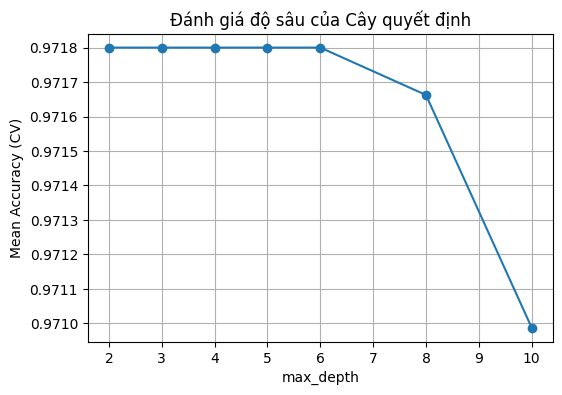

Best max_depth: {'max_depth': 2}


In [7]:
# TỐI ƯU max_depth BẰNG GRIDSEARCHCV
params = {'max_depth': [2, 3, 4, 5, 6, 8, 10]}
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)
grid_dt.fit(X_train, y_train)

# Biểu đồ kết quả GridSearch
results = pd.DataFrame(grid_dt.cv_results_)
plt.figure(figsize=(6,4))
plt.plot(results['param_max_depth'], results['mean_test_score'], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy (CV)')
plt.title('Đánh giá độ sâu của Cây quyết định')
plt.grid(True)
plt.show()

print("Best max_depth:", grid_dt.best_params_)


=== RỪNG CÂY ===
Accuracy: 0.97215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



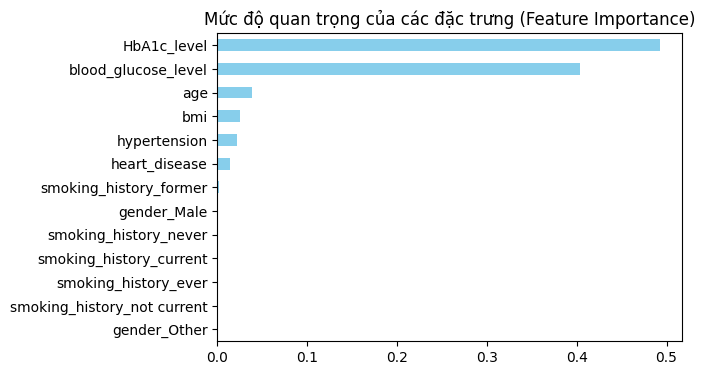

In [8]:
# XÂY DỰNG MÔ HÌNH RỪNG CÂY (RANDOM FOREST)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== RỪNG CÂY ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Biểu đồ Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(6,4))
feat_imp.plot(kind='barh', color='skyblue')
plt.title("Mức độ quan trọng của các đặc trưng (Feature Importance)")
plt.show()

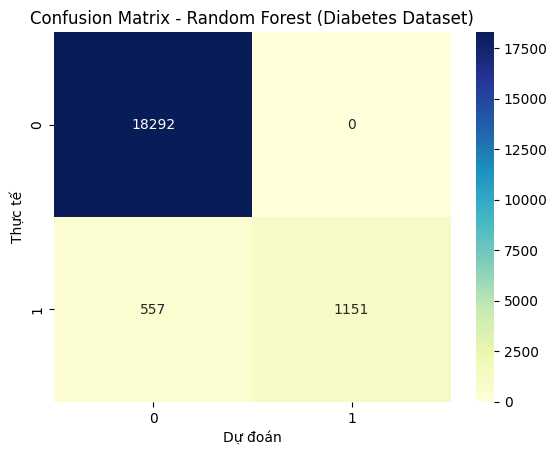

In [9]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Random Forest (Diabetes Dataset)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

SVM

In [10]:
# IMPORT CÁC THƯ VIỆN CẦN THIẾT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# NẠP VÀ XEM DỮ LIỆU
df = pd.read_csv("Data_Python_ST3/BT2/diabetes_prediction_dataset.csv")

print(" Kích thước dữ liệu:", df.shape)
print(df.head())

 Kích thước dữ liệu: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [12]:
# CHUẨN BỊ DỮ LIỆU
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X = pd.get_dummies(X, drop_first=True)
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# HUẤN LUYỆN MÔ HÌNH SVM CƠ BẢN
clf = svm.SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n=== KẾT QUẢ MÔ HÌNH SVM (Kernel = RBF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== KẾT QUẢ MÔ HÌNH SVM (Kernel = RBF) ===
Accuracy: 0.96135
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.97      0.56      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
# TÌM THAM SỐ TỐI ƯU BẰNG GRID SEARCH
param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\n Best Parameters:", grid.best_params_)
print("Best Accuracy (CV):", grid.best_score_)

In [ ]:
# ĐÁNH GIÁ MÔ HÌNH TỐI ƯU
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\n=== MÔ HÌNH SVM TỐI ƯU ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

In [ ]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - SVM (Diabetes Dataset)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [ ]:
# SO SÁNH GIỮA CÁC KERNEL
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []

for k in kernels:
    model = svm.SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.bar(kernels, scores, color='lightseagreen')
plt.title("So sánh độ chính xác giữa các kernel SVM")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.9)
plt.show()